## **Sentiment Based Product Recommendation System**

### *by Naveen Soni, Sameer Kumar and Sai Sandeep Ramakrishnagari*

Following tasks are performed below:
1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

### 1. Data sourcing and sentiment analysis

In [1]:
# Importing All Required Libraries
# General purpose liraries, NLTK and Models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Loading input data
sample30_dataset=pd.read_csv('sample30.csv')

In [3]:
sample30_dataset.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua       Positive  
1              NaN                  NaN        dorothy w       Positive  
2              NaN                  NaN        dorothy w       Positive  
3              NaN                  NaN          rebecca       Negative  
4              NaN                  NaN        walker557       Negative

### 1.1 EDA : Data Cleanning and Preprocessing Steps

In [4]:
# Checking info for NULL () values in data
sample30_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
# Making feature based on review title and review text for sentiment analysis
SA_dataset=sample30_dataset
SA_dataset['reviews_title_text']= sample30_dataset['reviews_title'].fillna('') +" "+ sample30_dataset['reviews_text']

In [6]:
# Dropping one row where user_sentiment is null
SA_dataset=SA_dataset[SA_dataset['user_sentiment'].isnull()== False]
SA_dataset.reset_index(drop=True)
SA_dataset.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  \
0      Los Angeles                  NaN           joshua       Positive   
1              NaN                  NaN        dorothy w       Positive   
2              NaN                  NaN        dorothy w       Positive   
3              NaN                  NaN          rebecca       Negative   
4              NaN                  NaN        walker557       Negative   

                                  reviews_title_text  
0  Just Awesome i love this album. it's very good...  
1  Good Good flavor. This review was collected as...  
2                                  Good Good flavor.  
3  Disappointed I read through the reviews on her...  
4  Irritation My husband bought this gel for us. ...

### Wordnet Object and POS tags

In [7]:
# Function for wordnet object value for the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Cleaning the text

def clean_text(text):
    # lower text
    text = text.lower()

    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]

    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]

    # join all
    text = " ".join(text)
    return(text)

# clean text data
SA_dataset["reviews_clean"] = SA_dataset.apply(lambda x: clean_text(x['reviews_title_text']),axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_17044\429557510.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_dataset["reviews_clean"] = SA_dataset.apply(lambda x: clean_text(x['reviews_title_text']),axis=1)


In [8]:
SA_dataset.head(5)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  \
0      Los Angeles                  NaN           joshua       Positive   
1              NaN                  NaN        dorothy w       Positive   
2              NaN                  NaN        dorothy w       Positive   
3              NaN                  NaN          rebecca       Negative   
4              NaN                  NaN        walker557       Negative   

                                  reviews_title_text  \
0  Just Awesome i love this album. it's very good...   
1  Good Good flavor. This review was collected as...   
2                                  Good Good flavor.   
3  Disappointed I read through the reviews on her...   
4  Irritation My husband bought this gel for us. ...   

                                       reviews_clean  
0  awesome love album good hip hop side current p...  
1     good good flavor review collect part promotion  
2                                   good good flavor  
3  disappoint read review look buy one couple lub...  
4  irritation husband buy gel gel caused irritati...

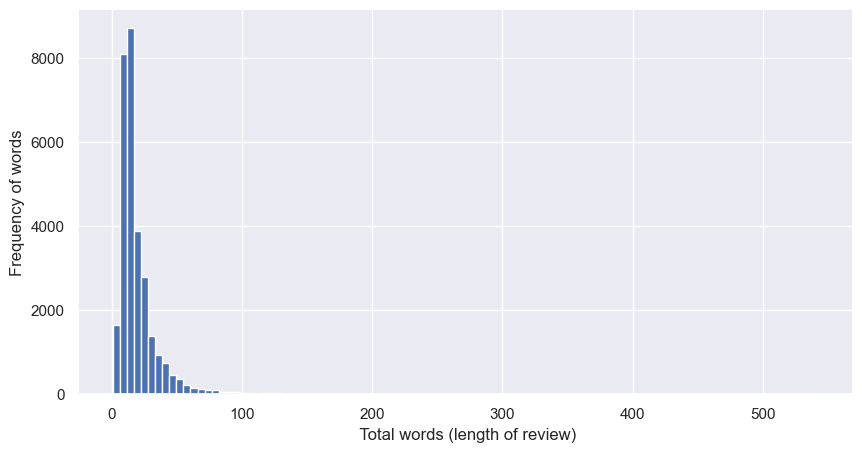

In [9]:
## Total number of words by frequency plot

sns.set(font_scale=1)
plt.figure(figsize = (10,5))
SA_dataset_words = SA_dataset.reviews_clean.apply(lambda x: len(x.split(" ")))
SA_dataset_words.hist(bins = 100)
plt.xlabel(' Total words (length of review)')
plt.ylabel('Frequency of words')
plt.show()

In [10]:
print('Average words:', SA_dataset_words.mean())
print('Skewness:', SA_dataset_words.skew())

Average words: 19.492916430547684
Skewness: 6.344025993536622


On an average there are around 20 words per review

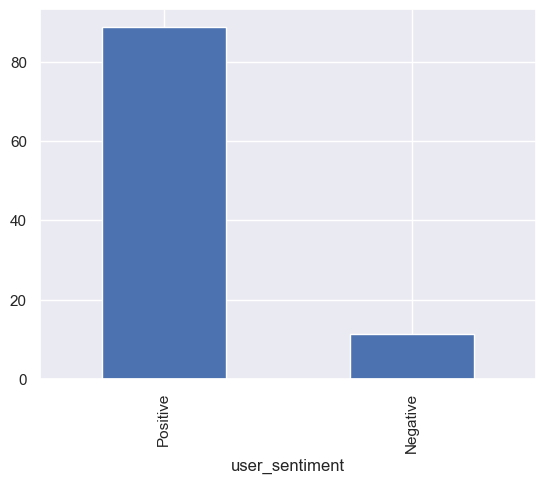

In [11]:
percent_plot = 100 * SA_dataset['user_sentiment'].value_counts()/len(SA_dataset_words)
percent_plot.plot.bar()
plt.show()

The review data provided is highly imabalanced based on user sentiment  

In [12]:
rating_plot = 100 * SA_dataset['reviews_rating'].value_counts()/len(SA_dataset)
rating_plot.plot.bar()
plt.show()

~70% of the ratings given are 5

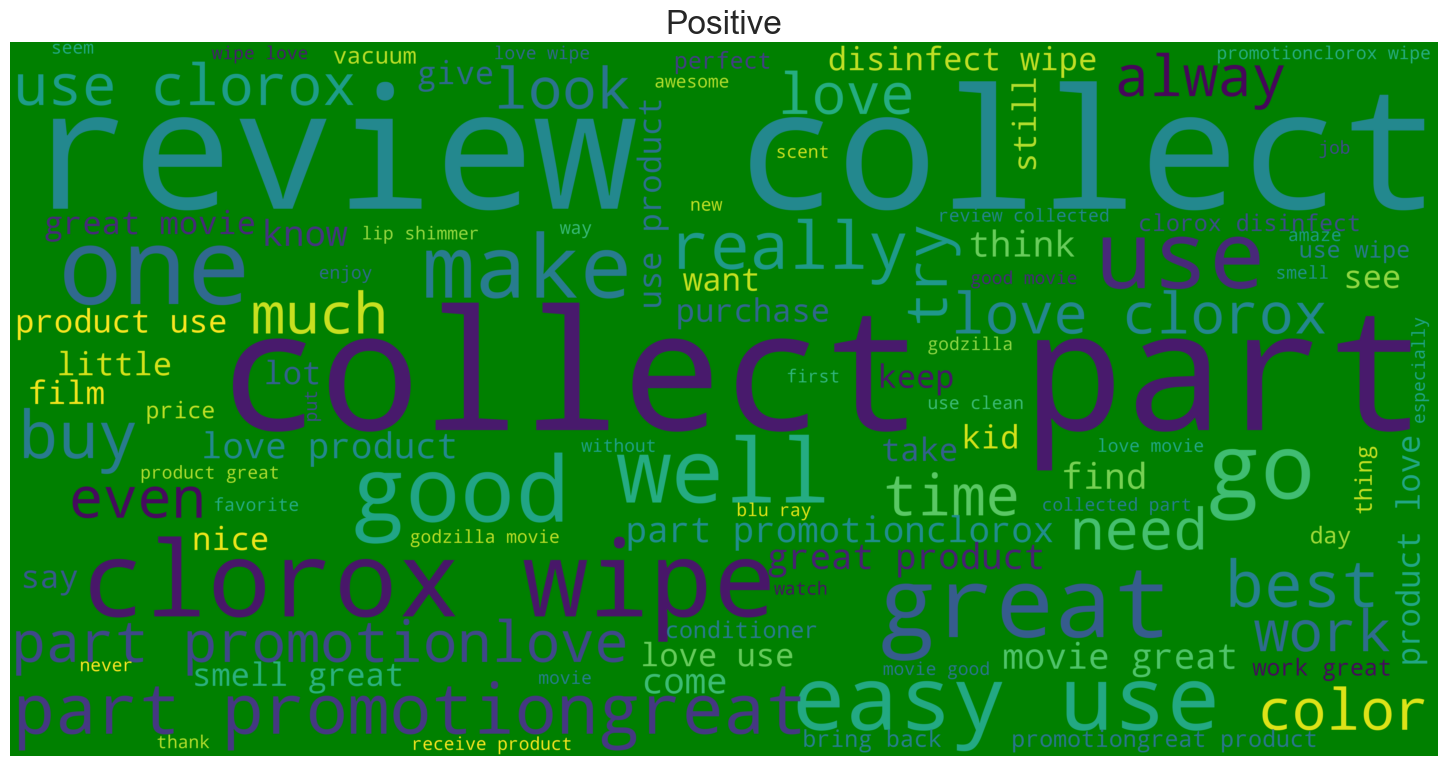

In [13]:
# Word clouds for postive and negative reviews

sns.set(font_scale=2)
plt.figure(figsize = (15,10))

plt.title('Positive')
SA_p_reviews=SA_dataset.loc[SA_dataset.user_sentiment=='Positive',['reviews_clean']]
word_cloud_text = ''.join(SA_p_reviews['reviews_clean'])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="green", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud,
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()



- Words associated with Positive reviews are mostly - 'great', 'promotion', 'good', 'love', 'use'

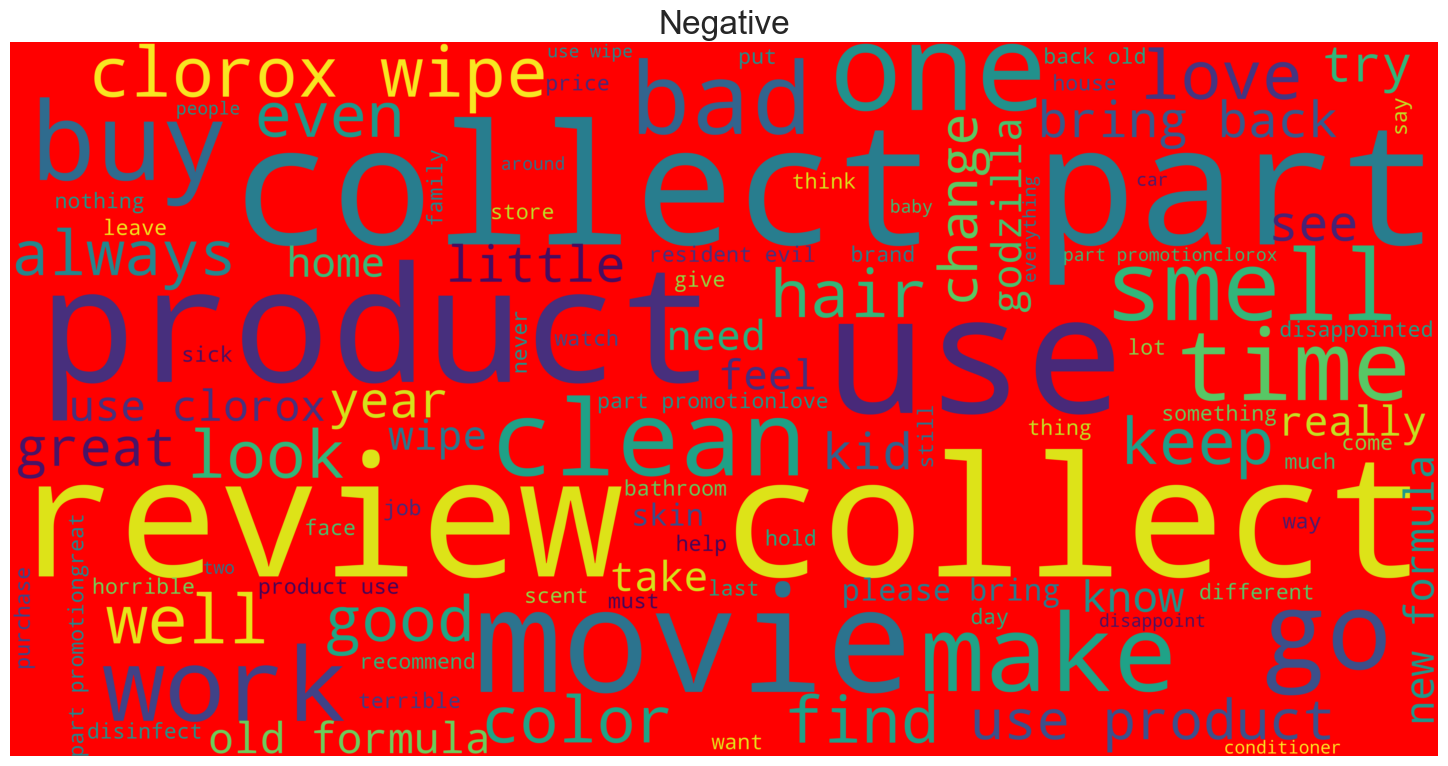

In [14]:

sns.set(font_scale=2)
plt.figure(figsize = (15,10))
plt.title('Negative')
SA_n_reviews=SA_dataset.loc[SA_dataset.user_sentiment=='Negative',['reviews_clean']]

word_cloud_text = ''.join(SA_n_reviews['reviews_clean'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="red", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud,
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.tight_layout()


- Words associated with Negative reviews are mostly - 'bad', 'horrible', 'smell', 'little', 'nothing'

In [15]:
# Feature encoding for sentiment field positive 1 and negative as 0

SA_dataset['Sentiment_coded'] = np.where(SA_dataset.user_sentiment == 'Positive',1,0)

# Printing the counts of each class
SA_dataset['Sentiment_coded'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_17044\3588649496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_dataset['Sentiment_coded'] = np.where(SA_dataset.user_sentiment == 'Positive',1,0)


Sentiment_coded
1    26632
0     3367
Name: count, dtype: int64

In [16]:
#df_clean = SA_dataset[['id','name', 'reviews_clean', 'Sentiment_coded']]

In [17]:
SA_dataset.head(5)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  \
0      Los Angeles                  NaN           joshua       Positive   
1              NaN                  NaN        dorothy w       Positive   
2              NaN                  NaN        dorothy w       Positive   
3              NaN                  NaN          rebecca       Negative   
4              NaN                  NaN        walker557       Negative   

                                  reviews_title_text  \
0  Just Awesome i love this album. it's very good...   
1  Good Good flavor. This review was collected as...   
2                                  Good Good flavor.   
3  Disappointed I read through the reviews on her...   
4  Irritation My husband bought this gel for us. ...   

                                       reviews_clean  Sentiment_coded  
0  awesome love album good hip hop side current p...                1  
1     good good flavor review collect part promotion                1  
2                                   good good flavor                1  
3  disappoint read review look buy one couple lub...                0  
4  irritation husband buy gel gel caused irritati...                0

### TF IDF - features formation

In [18]:
# Tf-idf for converting the clean & processed review text to features

from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=stopwords.words('english'), # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(SA_dataset["reviews_clean"])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [19]:
# Saving the vectorizer so that it can be used later while deploying the model

import pickle

# Save to file in the current working directory
pkl_filename = "Tfidf_vectorizer_NS.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_counts, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_tfidf_vectorizer = pickle.load(file)

In [20]:
# Splitting the data into train and test

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,SA_dataset['Sentiment_coded'],test_size = 0.2,random_state = 0)

In [21]:
# TEST data set
print(X_test_tfidf.shape)
print(y_test_tfidf.shape)

(6000, 17365)
(6000,)


In [22]:
# Train data set
print(X_train_tfidf.shape)
print(y_train_tfidf.shape)


(23999, 17365)
(23999,)


# **Models**

Following different ML models, will be build to predict sentiment based on title and text of the reviews

1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayesto

- **1.1 Logistic Regression model**

- As we already know the imbalance is there in the data, negative sentiments are quite low as compared to positive sentiments


- To handle the class imbalance of sentiments here, we will use SMOTE technique

In [23]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [24]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_tfidf == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_tfidf == 0)))


Before OverSampling, counts of label '1': 21287
Before OverSampling, counts of label '0': 2712 



In [25]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_tfidf, y_train_tfidf.ravel())

In [26]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (42574, 17365)
After OverSampling, the shape of train_y: (42574,) 



In [27]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 21287
After OverSampling, counts of label '0': 21287


In [28]:
# Training after handling imbalance

lr1 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr1.fit(X_train_res, y_train_res.ravel())
predictions1 = lr1.predict(X_test_tfidf)

# Confusion matrix
confusion = confusion_matrix(y_test_tfidf, predictions1)
print(confusion)

# print classification report
print(classification_report(y_test_tfidf, predictions1))
# Accuracy, F1 Score, Reacall and Precision
print("Accuracy : ",accuracy_score(y_test_tfidf, predictions1))
print("F1 score: ",f1_score(y_test_tfidf, predictions1))
print("Recall: ",recall_score(y_test_tfidf, predictions1))
print("Precision: ",precision_score(y_test_tfidf, predictions1))

[[ 532  123]
 [ 744 4601]]
              precision    recall  f1-score   support

           0       0.42      0.81      0.55       655
           1       0.97      0.86      0.91      5345

    accuracy                           0.86      6000
   macro avg       0.70      0.84      0.73      6000
weighted avg       0.91      0.86      0.87      6000

Accuracy :  0.8555
F1 score:  0.913894130499553
Recall:  0.8608044901777362
Precision:  0.9739627434377646


The Recall for both postive and negative sentiments is above 80%.


In [29]:
# Saving the model as it will be used later while deploying
import pickle

# Save to file in the current working directory
pkl_filename = "Logistic_Reg_Imbalance_NS.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr1, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_model = pickle.load(file)

- **2. Random Forest Classifier**

In [30]:
#Import Random Forest Model

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_res,y_train_res)

y_pred_RandomForest=clf.predict(X_test_tfidf)

In [31]:
confusion = confusion_matrix(y_test_tfidf, y_pred_RandomForest)
print(confusion)

[[ 255  400]
 [ 174 5171]]


In [32]:
# print classification report

print(classification_report(y_test_tfidf, y_pred_RandomForest))
print("F1 score: ",f1_score(y_test_tfidf, y_pred_RandomForest))

              precision    recall  f1-score   support

           0       0.59      0.39      0.47       655
           1       0.93      0.97      0.95      5345

    accuracy                           0.90      6000
   macro avg       0.76      0.68      0.71      6000
weighted avg       0.89      0.90      0.90      6000

F1 score:  0.9474166361304508


- Hyperparamter tuning needs to be done here as we can see Recall for minority class is too low

In [33]:
# Create the parameter grid based on the results of random search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [100,125,150,175],
    'min_samples_split': [200,250,300],
    'n_estimators': [250,350,500],
    'max_features': [10,15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, scoring="recall", n_jobs = -1,verbose = 1)

In [34]:
# Fit the grid search to the data
grid_search.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'max_features': [10, 15],
                         'min_samples_leaf': [100, 125, 150, 175],
                         'min_samples_split': [200, 250, 300],
                         'n_estimators': [250, 350, 500]},
             scoring='recall', verbose=1)

In [35]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8585528338628676 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 500}


In [36]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=30,
                             min_samples_leaf=150,
                             min_samples_split=300,
                             max_features=10,
                             n_estimators=500)

In [37]:
# fit
rfc.fit(X_train_res,y_train_res)

predictions_hpt_RF = rfc.predict(X_test_tfidf)
# Confusion matrix
confusion = confusion_matrix(y_test_tfidf, predictions_hpt_RF)
print(confusion)

# print classification report
print(classification_report(y_test_tfidf, predictions_hpt_RF))
print("Accuracy : ",accuracy_score(y_test_tfidf, predictions_hpt_RF))
print("F1 score: ",f1_score(y_test_tfidf, predictions_hpt_RF))
print("Recall: ",recall_score(y_test_tfidf, predictions_hpt_RF))
print("Precision: ",precision_score(y_test_tfidf, predictions_hpt_RF))


[[ 304  351]
 [ 982 4363]]
              precision    recall  f1-score   support

           0       0.24      0.46      0.31       655
           1       0.93      0.82      0.87      5345

    accuracy                           0.78      6000
   macro avg       0.58      0.64      0.59      6000
weighted avg       0.85      0.78      0.81      6000

Accuracy :  0.7778333333333334
F1 score:  0.8674818570434437
Recall:  0.8162768942937325
Precision:  0.9255409418752651


The minority class Recall score has improved but the model is not as good as the class imbalance handled Logistic Regression model

- **3. Xgboost Classifier**

In [38]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred_xgboost = model.predict(X_test_tfidf)
predictions_xgboost = [round(value) for value in y_pred_xgboost]

confusion = confusion_matrix(y_test_tfidf, predictions_xgboost)
print(confusion)

# print classification report
print(classification_report(y_test_tfidf, predictions_xgboost))


[[ 402  253]
 [ 422 4923]]
              precision    recall  f1-score   support

           0       0.49      0.61      0.54       655
           1       0.95      0.92      0.94      5345

    accuracy                           0.89      6000
   macro avg       0.72      0.77      0.74      6000
weighted avg       0.90      0.89      0.89      6000



In [40]:
print("Accuracy : ",accuracy_score(y_test_tfidf, predictions_xgboost))
print("F1 score: ",f1_score(y_test_tfidf, predictions_xgboost))
print("Recall: ",recall_score(y_test_tfidf, predictions_xgboost))
print("Precision: ",precision_score(y_test_tfidf, predictions_xgboost))

Accuracy :  0.8875
F1 score:  0.9358426005132591
Recall:  0.9210477081384472
Precision:  0.9511205564142194


Negative sentiments class score for Recall is improved from Random forest classifier model.

The best model so far is Logistic regression

**4. Naive Bayes Classifier**

In [41]:
from sklearn.naive_bayes import MultinomialNB

MNB=MultinomialNB()
MNB.fit(X_train_res,y_train_res)

MultinomialNB()

In [42]:
predicted_MNB=MNB.predict(X_test_tfidf)

confusion = confusion_matrix(y_test_tfidf, predicted_MNB)
print(confusion)

# print classification report
print(classification_report(y_test_tfidf, predicted_MNB))


[[ 416  239]
 [ 872 4473]]
              precision    recall  f1-score   support

           0       0.32      0.64      0.43       655
           1       0.95      0.84      0.89      5345

    accuracy                           0.81      6000
   macro avg       0.64      0.74      0.66      6000
weighted avg       0.88      0.81      0.84      6000



In [43]:
print("Accuracy : ",accuracy_score(y_test_tfidf, predicted_MNB))
print("F1 score: ",f1_score(y_test_tfidf, predicted_MNB))
print("Recall: ",recall_score(y_test_tfidf, predicted_MNB))
print("Precision: ",precision_score(y_test_tfidf, predicted_MNB))

Accuracy :  0.8148333333333333
F1 score:  0.8895296808193298
Recall:  0.8368568755846586
Precision:  0.9492784380305602


### We used balanced dataset and made 4 idfferent models, using Logistic Regression, Random forest classification, Naive Bayes, XGBoost. we finally found the Logistic Regression has the better predictions and recall scores from all other. we will use  logitisc Regression model for deployment

# **3. Building Recommendation System**

### **Recommendation system: User-User based**

In [44]:
user_reco= SA_dataset[SA_dataset['reviews_username'].isnull()== False]
user_reco.reset_index(drop=True)
print(len(user_reco))


29936


In [45]:
user_reco.head(5)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  \
0      Los Angeles                  NaN           joshua       Positive   
1              NaN                  NaN        dorothy w       Positive   
2              NaN                  NaN        dorothy w       Positive   
3              NaN                  NaN          rebecca       Negative   
4              NaN                  NaN        walker557       Negative   

                                  reviews_title_text  \
0  Just Awesome i love this album. it's very good...   
1  Good Good flavor. This review was collected as...   
2                                  Good Good flavor.   
3  Disappointed I read through the reviews on her...   
4  Irritation My husband bought this gel for us. ...   

                                       reviews_clean  Sentiment_coded  
0  awesome love album good hip hop side current p...                1  
1     good good flavor review collect part promotion                1  
2                                   good good flavor                1  
3  disappoint read review look buy one couple lub...                0  
4  irritation husband buy gel gel caused irritati...                0

In [46]:
# Test and Train split
train, test = train_test_split(SA_dataset, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)

(20999, 18)
(9000, 18)


In [47]:
# Pivot the train ratings
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)
print(df_pivot.shape)
df_pivot.head(5)

(18255, 251)


id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YpiJvvKc47QAVguxy  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YtGjdglJLPUi8IOfJ  AV1ZSp2uglJLPUi8IQFy  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                

 For predicition of products which a user has not rated, we will create dummy train where unrated products would be marked 1, and will ignore products already rated by marking them 0

 For Test dummy, to evaluate, the product already rated will be marked 1 opposite of dummy_train.

In [48]:
# dummy_train
dummy_train = train.copy()

# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [49]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YpiJvvKc47QAVguxy  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YtGjdglJLPUi8IOfJ  AV1ZSp2uglJLPUi8IQFy  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors, here we have made user vecotr, and would find the similiarity between tow users based on cosine similarity method

In [50]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
corr_user  = 1 - pairwise_distances(df_pivot, metric='cosine')
corr_user[np.isnan(corr_user)] = 0
print(corr_user)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [51]:
corr_user.shape

(18255, 18255)

### **Prediction postively related user-user**

Prediction for the users who are positively related with other users

In [52]:
corr_user[corr_user<0]=0
corr_user

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [53]:
corr_user_rating = np.dot(corr_user, df_pivot.fillna(0))
corr_user_rating

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.70014004, ..., 1.18754609, 0.        ,
        0.        ],
       [0.        , 0.        , 4.98332102, ..., 1.3996079 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.43033148, ..., 3.53553391, 0.        ,
        0.        ],
       [0.        , 0.        , 0.43033148, ..., 3.53553391, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.48443262, 0.        ,
        0.70014004]])

In [54]:
corr_user_rating.shape

(18255, 251)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [55]:
corr_user_rating_f = np.multiply(corr_user_rating,dummy_train)
corr_user_rating_f.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000              1.821161   
00sab00                       0.700140             11.993219   
02dakota                      4.983321             24.448713   
02deuce                       4.983321             24.448713   
0325home                      0.430331             13.751493   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              0.000000   
02dakota                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              3.123475   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       1.305582              0.000000   
02dakota                      0.000000              2.119252   
02deuce                       0.000000              2.119252   
0325home                      3.535534              0.000000   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YpiJvvKc47QAVguxy  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              3.429674   
02dakota                           0.0              3.492887   
02deuce                            0.0              3.492887   
0325home                           0.0              1.494122   

id                AV1YtGjdglJLPUi8IOfJ  AV1ZSp2uglJLPUi8IQFy  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       1.270003              0.000000   
02dakota                      1.333216              1.783765   
02deuce                       1.333216              1.783765   
0325home                

Finding top 5 recommendation for a user


In [56]:
# Take the user ID as input
#user_input = str(input("Enter your user name"))
#print(user_input)
user_input="00dog3"

In [58]:
res = corr_user_rating_f.loc[user_input].sort_values(ascending=False)[0:5]
res

id
AVpe41TqilAPnD_xQH3d    4.086619
AVpfRTh1ilAPnD_xYic2    3.935588
AVpfJP1C1cnluZ0-e3Xy    3.926541
AVpfiUrfLJeJML43-9nY    3.123475
AVpfPaoqLJeJML435Xk9    2.265458
Name: 00dog3, dtype: float64

In [59]:
mapping=user_reco[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

id                                        name
0   AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)
1   AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes
3   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel
30  AV1d76w7vKc47QAVhCqn        J.R. Watkins Hand Cream, Lemon Cream
36  AV1h6gSl-jtxr-f31p40               Ambi Complexion Cleansing Bar

In [60]:
# joining the id and namess here
res = pd.merge(res,mapping, left_on='id', right_on='id', how = 'left')
res

id    00dog3  \
0  AVpe41TqilAPnD_xQH3d  4.086619   
1  AVpfRTh1ilAPnD_xYic2  3.935588   
2  AVpfJP1C1cnluZ0-e3Xy  3.926541   
3  AVpfiUrfLJeJML43-9nY  3.123475   
4  AVpfPaoqLJeJML435Xk9  2.265458   

                                                name  
0       Mike Dave Need Wedding Dates (dvd + Digital)  
1  Planes: Fire Rescue (2 Discs) (includes Digita...  
2               Clorox Disinfecting Bathroom Cleaner  
3                  Delta Single Handle Shower Faucet  
4  Godzilla 3d Includes Digital Copy Ultraviolet ...

**Evaluated  recommendation system: User-user**

Evaluation will be done against the orginially rated products by a user and the system predicted ones, for this we need group of users who are present in both the train and test dataset


In [61]:
# Find out the common users of test and train dataset.
in_both = test[test.reviews_username.isin(train.reviews_username)]

In [62]:
in_both.head()

id          brand  \
20458  AVpfJP1C1cnluZ0-e3Xy         Clorox   
28827  AVpfW8y_LJeJML437ySW  L'oreal Paris   
9617   AVpf3VOfilAPnD_xjpun         Clorox   
9986   AVpf3VOfilAPnD_xjpun         Clorox   
27636  AVpfRTh1ilAPnD_xYic2         Disney   

                                              categories    manufacturer  \
20458  Household Chemicals,Household Cleaners,Bath & ...  AmazonUs/CLOO7   
28827  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   L'oreal Paris   
9617   Household Essentials,Cleaning Supplies,Kitchen...          Clorox   
9986   Household Essentials,Cleaning Supplies,Kitchen...          Clorox   
27636  Movies, Music & Books,Movies,Kids' & Family,Wa...     Walt Disney   

                                                    name  \
20458               Clorox Disinfecting Bathroom Cleaner   
28827  L'or233al Paris Elvive Extraordinary Clay Reba...   
9617   Clorox Disinfecting Wipes Value Pack Scented 1...   
9986   Clorox Disinfecting Wipes Value Pack Scented 1...   
27636  Planes: Fire Rescue (2 Discs) (includes Digita...   

                   reviews_date reviews_didPurchase reviews_doRecommend  \
20458  2012-01-26T00:00:00.000Z               False                True   
28827  2017-01-14T10:30:41.000Z                 NaN                 NaN   
9617   2012-01-27T14:18:57.000Z                 NaN                True   
9986   2015-02-21T00:00:00.000Z               False                True   
27636  2014-12-05T00:00:00.000Z                 NaN                True   

       reviews_rating                                       reviews_text  \
20458               5  The product is wonderful in the shower and the...   
28827               1  i didn't not like this product, i received it ...   
9617                5  I love the wipes i use them all over my house,...   
9986                5  I love the ease of use of the wipes. They clea...   
27636               5  A much more interesting movie than "Planes" or...   

                        reviews_title reviews_userCity reviews_userProvince  \
20458       Works great in the shower              NaN                  NaN   
28827              Not Very Hydrating          Buffalo                  NaN   
9617             Overall Grat Product       Middletown                  NaN   
9986                 Love these wipes              NaN                  NaN   
27636  A fun movie with some messages              NaN                  NaN   

      reviews_username user_sentiment  \
20458      cleansmells       Positive   
28827        kelly4729       Positive   
9617          earreaga       Positive   
9986         ncmom2224       Positive   
27636          raymond       Positive   

                                      reviews_title_text  \
20458  Works great in the shower The product is wonde...   
28827  Not Very Hydrating i didn't not like this prod...   
9617   Overall Grat Product I love the wipes i use th...   
9986   Love these wipes I love the ease of use of the...   
27636  A fun movie with some messages A much more int...   

                                           reviews_clean  Sentiment_coded  
20458  work great shower product wonderful shower sin...                1  
28827  hydrate like product receive influenster fan f...                1  
9617   overall grat product love wipe use house smell...                1  
9986   love wipe love ease use wipe clean well nice s...                1  
27636  fun movie message much interesting movie plane...                1

In [63]:
# convert into the user-product matrix.
user_based_matrix = in_both.pivot_table(index='reviews_username',columns='id',values='reviews_rating')
user_based_matrix.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1YneDPglJLPUi8IJyQ  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1ZSp2uglJLPUi8IQFy  AV1h6Gu0glJLPUi8IjA_  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1l8zRZvKc47QAVhnAv  AVpe-ltS1cnluZ0-bL8w  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AVpe31o71cnluZ0-YrSD  AVpe41TqilAPnD_xQH3d  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   4.0   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AVpe4hlXLJeJML43xbrB  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
00sab00                            3.0                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                   

In [64]:
# Convert the user_correlation matrix into dataframe.
corr_user_df = pd.DataFrame(corr_user)
corr_user_df.head()

0      1      2      3      4      5      6      7      8      9      \
0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   

   10     11     12     13     14     15     16     17     18     19     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
4    1.0    1.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

   20     21     22     23     24     25     26     27     28     29     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    0.0   

   30     31     32     33     34     35     36     37     38     39     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0   
3    0.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40     41     42     43     44     45     46     47     48     49     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

   50     51     52     53     54     55     56     57     58     59     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   

   60     61     62     63     64     65     66     67     68     69     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
4    0.0    1.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

   70     71     72     73     74     75     76     77     78     79     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

   80     81     82     83     84     85     86     87     88     89     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    1.0    0.0    0

In [65]:
corr_user_df['reviews_username'] = df_pivot.index

corr_user_df.set_index('reviews_username',inplace=True)
corr_user_df.head()

0      1      2      3      4      5      6      7      \
reviews_username                                                           
00dog3              1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

                  8      9      10     11     12     13     14     15     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
0325home            0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   

                  16     17     18     19     20     21     22     23     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
0325home            1.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   

                  24     25     26     27     28     29     30     31     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

                  32     33     34     35     36     37     38     39     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0   
02deuce             1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  40     41     42     43     44     45     46     47     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

                  48     49     50     51     52     53     54     55     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
0325home            0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

                  56     57     58     59     60     61     62     63     \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    1.0    0.0 

In [66]:
in_both.head(1)

id   brand  \
20458  AVpfJP1C1cnluZ0-e3Xy  Clorox   

                                              categories    manufacturer  \
20458  Household Chemicals,Household Cleaners,Bath & ...  AmazonUs/CLOO7   

                                       name              reviews_date  \
20458  Clorox Disinfecting Bathroom Cleaner  2012-01-26T00:00:00.000Z   

      reviews_didPurchase reviews_doRecommend  reviews_rating  \
20458               False                True               5   

                                            reviews_text  \
20458  The product is wonderful in the shower and the...   

                   reviews_title reviews_userCity reviews_userProvince  \
20458  Works great in the shower              NaN                  NaN   

      reviews_username user_sentiment  \
20458      cleansmells       Positive   

                                      reviews_title_text  \
20458  Works great in the shower The product is wonde...   

                                           reviews_clean  Sentiment_coded  
20458  work great shower product wonderful shower sin...                1

In [67]:
list_name = in_both.reviews_username.tolist()

corr_user_df.columns = df_pivot.index.tolist()
corr_user_df_1 =  corr_user_df[corr_user_df.index.isin(list_name)]

In [68]:
corr_user_df_1.shape

(1691, 18255)

In [69]:
corr_user_df_2 = corr_user_df_1.T[corr_user_df_1.T.index.isin(list_name)]

In [70]:
corr_user_df_3 = corr_user_df_2.T

In [71]:
print(corr_user_df_3.shape)
corr_user_df_3.head()

(1691, 1691)


00sab00  123charlie  1943  4djs  50cal  7inthenest  85lisa  \
reviews_username                                                               
00sab00               1.0         0.0   0.0   0.0    0.0         0.0     0.0   
123charlie            0.0         1.0   0.0   0.0    0.0         0.0     0.0   
1943                  0.0         0.0   1.0   0.0    0.0         0.0     0.0   
4djs                  0.0         0.0   0.0   1.0    0.0         1.0     1.0   
50cal                 0.0         0.0   0.0   0.0    1.0         0.0     0.0   

                  aalyah     aaron  abbey      abby  abc  abcdef  abcgator  \
reviews_username                                                             
00sab00              0.0  0.492366    0.0  0.000000  0.0     0.0       0.0   
123charlie           0.0  0.000000    0.0  0.000000  0.0     0.0       0.0   
1943                 0.0  0.000000    0.0  0.707107  0.0     1.0       0.0   
4djs                 0.0  0.000000    0.0  0.000000  0.0     0.0       0.0   
50cal                0.0  0.000000    0.0  0.000000  0.0     0.0       0.0   

                  abigail  abismomy  acellacey  acg1  acjuarez08  \
reviews_username                                                   
00sab00               0.0  0.000000        0.0   0.0         0.0   
123charlie            0.0  0.000000        0.0   0.0         0.0   
1943                  0.0  0.000000        0.0   0.0         0.0   
4djs                  0.0  0.707107        1.0   0.0         0.0   
50cal                 0.0  0.000000        0.0   0.0         0.0   

                  actionaction      adam  adizzione  adma2  adriana9999  \
reviews_username                                                          
00sab00                    0.0  0.000000        0.0    0.0     0.000000   
123charlie                 0.0  0.536895        0.0    0.0     0.000000   
1943                       0.0  0.000000        0.0    1.0     0.000000   
4djs                       0.0  0.000000        0.0    0.0     0.707107   
50cal                      0.0  0.000000        0.0    0.0     0.000000   

                  afwifey2003  agmt  aisha   aj    aj1135  ajackson75  \
reviews_username                                                        
00sab00                   0.0   0.0    0.0  0.0  0.000000         0.0   
123charlie                0.0   0.0    0.0  0.0  0.000000         0.0   
1943                      0.0   0.0    0.0  0.0  0.000000         0.0   
4djs                      1.0   0.0    0.0  0.0  0.707107         1.0   
50cal                     0.0   0.0    0.0  0.0  0.000000         0.0   

                      ajay  ajcrossover11     ajune  akesler19  akhan  \
reviews_username                                                        
00sab00           0.000000            0.0  0.000000        0.0    0.0   
123charlie        0.707107            0.0  0.000000        0.0    0.0   
1943              0.000000            0.0  0.000000        0.0    0.0   
4djs              0.000000            0.0  0.707107        1.0    0.0   
50cal             0.000000            0.0  0.000000        0.0    0.0   

                  akporter84  alena125      alex  alexa86    alexis  ali1353  \
reviews_username                                                               
00sab00                  0.0       0.0  0.412948      0.0  0.000000      0.0   
123charlie               0.0       0.0  0.596481      0.0  0.000000      0.0   
1943                     0.0       0.0  0.000000      0.0  0.000000      0.0   
4djs                     0.0       0.0  0.000000      0.0  0.524142      0.0   
50cal                    0.0       0.0  0.000000      0.0  0.000000      0.0   

                  alisonr  allison33  ally  ally1989  allyj1984  alm27  \
reviews_username                                                         
00sab00               0.0        0.0   0.0       0.0        0.0    0.0   
123charlie            0.0        0.0   0.0       0.0        0.0    0.0   
1943                  0.0 

In [72]:
corr_user_df_3[corr_user_df_3<0]=0

both_user_predicted_ratings = np.dot(corr_user_df_3, user_based_matrix.fillna(0))
both_user_predicted_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  4.23999152,
         2.26133508,  0.        ],
       [ 0.        ,  3.3098873 ,  0.        , ...,  2.6499947 ,
         0.        ,  0.        ],
       [ 0.        ,  7.88675135,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 55.48741005,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
dummy_test = in_both.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(0)
print(dummy_test.shape)

(1691, 128)


In [74]:
print(user_based_matrix.shape)
user_based_matrix.head()

(1691, 128)


id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1YneDPglJLPUi8IJyQ  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1ZSp2uglJLPUi8IQFy  AV1h6Gu0glJLPUi8IjA_  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AV1l8zRZvKc47QAVhnAv  AVpe-ltS1cnluZ0-bL8w  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AVpe31o71cnluZ0-YrSD  AVpe41TqilAPnD_xQH3d  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   4.0   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AVpe4hlXLJeJML43xbrB  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                               
00sab00                            NaN                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                              NaN                   NaN   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
00sab00                            3.0                   NaN   
123charlie                         NaN                   NaN   
1943                               NaN                   NaN   
4djs                               NaN                   NaN   
50cal                   

In [75]:
print(dummy_test.shape)
dummy_test.head()

(1691, 128)


id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1ZSp2uglJLPUi8IQFy  AV1h6Gu0glJLPUi8IjA_  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1l8zRZvKc47QAVhnAv  AVpe-ltS1cnluZ0-bL8w  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AVpe31o71cnluZ0-YrSD  AVpe41TqilAPnD_xQH3d  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   1.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AVpe4hlXLJeJML43xbrB  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
00sab00                            1.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                   

In [76]:
both_user_predicted_ratings = np.multiply(both_user_predicted_ratings,dummy_test)
both_user_predicted_ratings.head()

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1ZSp2uglJLPUi8IQFy  AV1h6Gu0glJLPUi8IjA_  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AV1l8zRZvKc47QAVhnAv  AVpe-ltS1cnluZ0-bL8w  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AVpe31o71cnluZ0-YrSD  AVpe41TqilAPnD_xQH3d  \
reviews_username                                               
00sab00                            0.0              0.000000   
123charlie                         0.0             61.895422   
1943                               0.0              0.000000   
4djs                               0.0              0.000000   
50cal                              0.0              0.000000   

id                AVpe4hlXLJeJML43xbrB  AVpe4pnBilAPnD_xQDeb  \
reviews_username                                               
00sab00                            0.0                   0.0   
123charlie                         0.0                   0.0   
1943                               0.0                   0.0   
4djs                               0.0                   0.0   
50cal                              0.0                   0.0   

id                AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  \
reviews_username                                               
00sab00                      47.954684                   0.0   
123charlie                    0.000000                   0.0   
1943                          0.000000                   0.0   
4djs                          0.000000                   0.0   
50cal                   

In [77]:
#calculate RMSE
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = both_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan  5. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [78]:
in_both_p = in_both.pivot_table(index='reviews_username',columns='id',values='reviews_rating')

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((in_both_p - y )**2))/total_non_nan)**0.5
print(rmse)

2.126958072324658


RMSE for User based recommendation system is ~ 1.1

## **Recommendation System: Item-Item based**

In [79]:
df_pivot_item= train.pivot_table(
   index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot_item.head()

reviews_username      00dog3  00sab00  02dakota  02deuce  0325home  \
id                                                                   
AV13O1A8GV-KLJ3akUyj     NaN      NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  1085  10ten  11111111aaaaaaaaaaaaaaaaa  \
id                                                                          
AV13O1A8GV-KLJ3akUyj          NaN   NaN    NaN                        NaN   
AV14LG0R-jtxr-f38QfS          NaN   NaN    NaN                        NaN   
AV16khLE-jtxr-f38VFn          NaN   NaN    NaN                        NaN   
AV1YGDqsGV-KLJ3adc-O          NaN   NaN    NaN                        NaN   
AV1YIch7GV-KLJ3addeG          NaN   NaN    NaN                        NaN   

reviews_username      1143mom  1234561  1234567  1234asdf  123cat123  \
id                                                                     
AV13O1A8GV-KLJ3akUyj      NaN      NaN      NaN       NaN        NaN   
AV14LG0R-jtxr-f38QfS      NaN      NaN      NaN       NaN        NaN   
AV16khLE-jtxr-f38VFn      NaN      NaN      NaN       NaN        NaN   
AV1YGDqsGV-KLJ3adc-O      3.0      NaN      NaN       NaN        NaN   
AV1YIch7GV-KLJ3addeG      NaN      NaN      NaN       NaN        NaN   

reviews_username      123charlie  123numbers  123rs  123soccermom  123too  \
id                                                                          
AV13O1A8GV-KLJ3akUyj         NaN         NaN    NaN           NaN     NaN   
AV14LG0R-jtxr-f38QfS         NaN         NaN    NaN           NaN     NaN   
AV16khLE-jtxr-f38VFn         NaN         NaN    NaN           NaN     NaN   
AV1YGDqsGV-KLJ3adc-O         NaN         NaN    NaN           NaN     NaN   
AV1YIch7GV-KLJ3addeG         NaN         NaN    NaN           NaN     NaN   

reviews_username      127726  12cass12  12gage  132457  13dani  13ld  13ram  \
id                                                                            
AV13O1A8GV-KLJ3akUyj     NaN       NaN     NaN     NaN     NaN   NaN    NaN   
AV14LG0R-jtxr-f38QfS     NaN       NaN     NaN     NaN     NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn     NaN       NaN     NaN     NaN     NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O     NaN       NaN     NaN     NaN     NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG     NaN       NaN     NaN     NaN     NaN   NaN    NaN   

reviews_username      1421nikki  143st  148maine  1515  15425shopper  1616  \
id                                                                           
AV13O1A8GV-KLJ3akUyj        NaN    NaN       NaN   NaN           NaN   NaN   
AV14LG0R-jtxr-f38QfS        NaN    NaN       NaN   NaN           NaN   NaN   
AV16khLE-jtxr-f38VFn        NaN    NaN       NaN   NaN           NaN   NaN   
AV1YGDqsGV-KLJ3adc-O        NaN    NaN       NaN   NaN           NaN   NaN   
AV1YIch7GV-KLJ3addeG        NaN    NaN       NaN   NaN           NaN   NaN   

reviews_username      18612  1863philly  1943  1968bear  1970  1979edes  \
id                                                                        
AV13O1A8GV-KLJ3akUyj    NaN         NaN   NaN       NaN   NaN       NaN   
AV14LG0R-jtxr-f38QfS    NaN         NaN   NaN       NaN   NaN       NaN   
AV16khLE-jtxr-f38VFn    NaN         NaN   NaN       NaN   NaN       NaN   
AV1YGDqsGV-KLJ3adc-O    NaN         NaN   NaN       NaN   NaN       NaN   
AV1YIch7GV-KLJ3addeG    NaN         NaN   NaN       NaN   NaN       NaN   

reviews_username      1992firebirdgirl  19bubba67  19granny  1awesome1  \
id                                                                       
AV13O1A8GV-KLJ3akUyj               NaN        NaN       NaN        NaN   
AV14LG0R-jtxr-f38QfS               NaN        NaN       NaN        NaN   
A

In [80]:
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_corr = 1 - pairwise_distances(df_pivot_item.fillna(0), metric='cosine')
item_corr[np.isnan(item_corr)] = 0
print(item_corr)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [81]:
item_corr.shape

(251, 251)

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [82]:
item_corr[item_corr<0]=0
item_corr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Prediction item-item**

In [83]:
item_pred_rating = np.dot((df_pivot_item.fillna(0).T),item_corr)
item_pred_rating

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00358422, ..., 0.00335215, 0.        ,
        0.        ],
       [0.        , 0.        , 0.07504471, ..., 0.00919098, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00194924, ..., 0.00227879, 0.        ,
        0.        ],
       [0.        , 0.        , 0.0048731 , ..., 0.00569697, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02069011, 0.        ,
        0.01699722]])

In [84]:
print(item_pred_rating.shape)
print(dummy_train.shape)

(18255, 251)
(18255, 251)


Filtering the rating only for products not rated by the user for recommendation

In [85]:
item_rating_f = np.multiply(item_pred_rating,dummy_train)
item_rating_f.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000              0.083582   
00sab00                       0.003584              0.022226   
02dakota                      0.075045              0.083349   
02deuce                       0.060036              0.066679   
0325home                      0.004873              0.026050   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              0.000000   
02dakota                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              0.008145   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.006787              0.000000   
02dakota                      0.000000              0.019796   
02deuce                       0.000000              0.015837   
0325home                      0.015380              0.000000   

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YneDPglJLPUi8IJyQ  AV1YpiJvvKc47QAVguxy  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              0.027623   
02dakota                           0.0              0.065731   
02deuce                            0.0              0.052585   
0325home                           0.0              0.020300   

id                AV1YtGjdglJLPUi8IOfJ  AV1ZSp2uglJLPUi8IQFy  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.006726              0.000000   
02dakota                      0.016427              0.045805   
02deuce                       0.013142              0.036644   
0325home                

Finding the top 5 recommendation for the user

In [86]:
# Take the user ID as input
#user_input = str(input("Enter your user name"))
#print(user_input)
user_input="02deuce"

In [87]:
# Recommending the Top 5 products to the user.
products_rat = item_rating_f.loc[user_input].sort_values(ascending=False)[0:5]
products_rat

id
AVpe41TqilAPnD_xQH3d    0.143115
AVpfRTh1ilAPnD_xYic2    0.137894
AVpf0eb2LJeJML43EVSt    0.135400
AVpe59io1cnluZ0-ZgDU    0.112049
AVpf2tw1ilAPnD_xjflC    0.106087
Name: 02deuce, dtype: float64

In [88]:
mapping= user_reco[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

id                                        name
0   AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)
1   AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes
3   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel
30  AV1d76w7vKc47QAVhCqn        J.R. Watkins Hand Cream, Lemon Cream
36  AV1h6gSl-jtxr-f31p40               Ambi Complexion Cleansing Bar

In [89]:
products_rat = pd.merge(products_rat,mapping, left_on='id', right_on='id', how = 'left')
products_rat

id   02deuce  \
0  AVpe41TqilAPnD_xQH3d  0.143115   
1  AVpfRTh1ilAPnD_xYic2  0.137894   
2  AVpf0eb2LJeJML43EVSt  0.135400   
3  AVpe59io1cnluZ0-ZgDU  0.112049   
4  AVpf2tw1ilAPnD_xjflC  0.106087   

                                                name  
0       Mike Dave Need Wedding Dates (dvd + Digital)  
1  Planes: Fire Rescue (2 Discs) (includes Digita...  
2     The Resident Evil Collection 5 Discs (blu-Ray)  
3  My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...  
4                   Red (special Edition) (dvdvideo)

**Evaluation item -item**


In [90]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment',
       'reviews_title_text', 'reviews_clean', 'Sentiment_coded'],
      dtype='object')

In [91]:
item_in_common = test[test.id.isin(train.id	)]
print(item_in_common.shape)
item_in_common.head()

(8976, 18)


id    brand  \
4332   AVpe9W4D1cnluZ0-avf0   Hoover   
3434   AVpe5s3RLJeJML43x4eA  Pantene   
20458  AVpfJP1C1cnluZ0-e3Xy   Clorox   
26478  AVpfPPkEilAPnD_xX3cP   Aveeno   
19781  AVpfJP1C1cnluZ0-e3Xy   Clorox   

                                              categories  \
4332   Home,Home Appliances,Vacuums & Floor Care,Upri...   
3434   Personal Care,Hair Care,Conditioner,Beauty,Sha...   
20458  Household Chemicals,Household Cleaners,Bath & ...   
26478  Personal Care,Sun Care,Featured Brands,Health ...   
19781  Household Chemicals,Household Cleaners,Bath & ...   

                  manufacturer  \
4332                    Hoover   
3434   Pantene Pro-V Hair Care   
20458           AmazonUs/CLOO7   
26478              Aveeno Baby   
19781           AmazonUs/CLOO7   

                                                    name  \
4332   Hoover174 Platinum Collection153 Lightweight B...   
3434   Pantene Pro-V Expert Collection Age Defy Condi...   
20458               Clorox Disinfecting Bathroom Cleaner   
26478  Aveeno Baby Continuous Protection Lotion Sunsc...   
19781               Clorox Disinfecting Bathroom Cleaner   

                   reviews_date reviews_didPurchase reviews_doRecommend  \
4332   2010-09-10T00:00:00.000Z               False                True   
3434   2016-04-08T00:00:00.000Z               False                 NaN   
20458  2012-01-26T00:00:00.000Z               False                True   
26478  2010-07-26T21:30:15.000Z                 NaN                 NaN   
19781  2012-02-05T00:00:00.000Z               False                True   

       reviews_rating                                       reviews_text  \
4332                5  I've only owned this product for 4 weeks so co...   
3434                5  This is thick stuff! I was surprised by the co...   
20458               5  The product is wonderful in the shower and the...   
26478               1  I started to apply it on my little one and she...   
19781               5  I always use them in the bathroom, kitchen, an...   

                   reviews_title reviews_userCity reviews_userProvince  \
4332                   Great buy              NaN                  NaN   
3434       Serious conditioning!              NaN                  NaN   
20458  Works great in the shower              NaN                  NaN   
26478                What A Mess              NaN                  NaN   
19781                     great!              NaN                  NaN   

      reviews_username user_sentiment  \
4332          sansname       Positive   
3434      jennypstrong       Positive   
20458      cleansmells       Positive   
26478        new mommy       Positive   
19781          klp2324       Positive   

                                      reviews_title_text  \
4332   Great buy I've only owned this product for 4 w...   
3434   Serious conditioning! This is thick stuff! I w...   
20458  Works great in the shower The product is wonde...   
26478  What A Mess I started to apply it on my little...   
19781  great! I always use them in the bathroom, kitc...   

                                           reviews_clean  Sentiment_coded  
4332   great buy i've own product week consider durab...                1  
3434   serious condition thick stuff surprise consist...                1  
20458  work great shower product wonderful shower sin...                1  
26478  mess start apply little one rubbed eye immedia...                1  
19781  great always use bathroom kitchen occasionally...                1

In [92]:
item_in_common_based_matrix = item_in_common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [93]:
item_in_common_based_matrix.shape

(197, 8329)

In [94]:
item_corr_df = pd.DataFrame(item_corr)
item_corr_df.head(5)

0    1    2    3    4    5    6    7    8    9    10   11       12   13   \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.01789  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0   

   14   15   16   17        18   19   20   21   22        23   24   25   26   \
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.003537  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.000698  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

   27   28   29   30        31   32   33   34        35   36   37   38   39   \
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.003584  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.006055  0.0  0.0  0.0  0.022226  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   

        40   41   42        43   44   45        46   47   48   49   50   \
0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
1  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
2  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
3  0.008174  0.0  0.0  0.053191  0.0  0.0  0.008999  0.0  0.0  0.0  0.0   
4  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   

        51   52   53   54        55   56   57   58   59   60   61   62   63   \
0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.020896  0.0  0.0  0.0  0.010272  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   64        65        66        67        68   69        70        71   \
0  0.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
1  0.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
2  0.0  0.000000  0.000000  0.020483  0.005111  0.0  0.000000  0.000000   
3  0.0  0.007146  0.054863  0.004380  0.000000  0.0  0.064504  0.006649   
4  0.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

        72        73   74   75   76   77   78   79   80   81        82   83   \
0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3  0.020185  0.033641  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.007425  0.0   
4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

   84        85   86   87        88        89        90   91        92   \
0  0.0  0.000000  0.0  0.0  0.039522  0.000000  0.000000  0.0  0.000000   
1  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
2  0.0  0.000000  0.0  0.0  0.000000  0.004181  0.000975  0.0  0.000000   
3  0.0  0.001646  0.0  0.0  0.008176  0.033082  0.005210  0.0  0.051184   
4  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.000000   

        93        94   95        96        97   98        99   ...       151  \
0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000  ...  0.000000   
1  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000  ...  0.000000   
2  0.000000

In [95]:
item_corr_df['id'] = df_pivot_item.index
item_corr_df.set_index('id',inplace=True)
item_corr_df.head()

0    1    2    3    4    5    6    7    8    9    10   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

                      11       12   13   14   15   16   17        18   19   \
id                                                                           
AV13O1A8GV-KLJ3akUyj  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.01789  0.0  0.0  0.0  0.0  0.0  0.000698  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

                      20   21   22        23   24   25   26   27   28   29   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.003537  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   

                      30        31   32   33   34        35   36   37   38   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.000000  0.0  0.0  0.0  0.003584  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.006055  0.0  0.0  0.0  0.022226  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

                      39        40   41   42        43   44   45        46   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
AV14LG0R-jtxr-f38QfS  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
AV16khLE-jtxr-f38VFn  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   
AV1YGDqsGV-KLJ3adc-O  0.0  0.008174  0.0  0.0  0.053191  0.0  0.0  0.008999   
AV1YIch7GV-KLJ3addeG  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000   

                      47   48   49   50        51   52   53   54        55   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.020896  0.0  0.0  0.0  0.010272   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   

                      56   57   58   59   60   61   62   63   64        65   \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.007146   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   

                           66        67        68   69        70        71   \
id                                                                      

In [96]:
list_name = item_in_common.id.tolist()

item_corr_df.columns = df_pivot_item.index.tolist()

item_corr_df_1 =  item_corr_df[item_corr_df.index.isin(list_name)]

item_corr_df_2 = item_corr_df_1.T[item_corr_df_1.T.index.isin(list_name)]

item_corr_df_3 = item_corr_df_2.T
item_corr_df_3.head()

AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
id                                                                 
AV16khLE-jtxr-f38VFn                   1.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   1.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   1.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   1.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   1.0                   0.0   

                      AV1Yn94nvKc47QAVgtst  AV1Ynb3bglJLPUi8IJxJ  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1YneDPglJLPUi8IJyQ  AV1YqAaMGV-KLJ3adiDj  \
id                                                                 
AV16khLE-jtxr-f38VFn               0.00000                   0.0   
AV1YGDqsGV-KLJ3adc-O               0.01789                   0.0   
AV1YlENIglJLPUi8IHsX               0.00000                   0.0   
AV1YmBrdGV-KLJ3adewb               0.00000                   0.0   
AV1YmDL9vKc47QAVgr7_               0.00000                   0.0   

                      AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1ZSp2uglJLPUi8IQFy  AV1ZT7GLglJLPUi8IQLI  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0              0.000000   
AV1YGDqsGV-KLJ3adc-O                   0.0              0.000698   
AV1YlENIglJLPUi8IHsX                   0.0              0.000000   
AV1YmBrdGV-KLJ3adewb                   0.0              0.000000   
AV1YmDL9vKc47QAVgr7_                   0.0              0.000000   

                      AV1ZVIgy-jtxr-f31W9N  AV1d76w7vKc47QAVhCqn  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0              0.003537   
AV

In [97]:
item_corr_df_3[item_corr_df_3<0]=0
item_in_common_predicted_ratings = np.dot(item_corr_df_3, item_in_common_based_matrix.fillna(0))
print(item_in_common_predicted_ratings.shape)
item_in_common_predicted_ratings

(197, 8329)


array([[0.        , 0.04502682, 0.        , ..., 0.        , 0.0048731 ,
        0.00389848],
       [0.02452235, 0.05000934, 0.00822921, ..., 0.04087906, 0.02605003,
        0.02084003],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01241407, 0.00551459, 0.        , ..., 0.        , 0.00569697,
        0.00455758],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01019833, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [98]:
dummy_test = item_in_common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)
item_in_common_predicted_ratings = np.multiply(item_in_common_predicted_ratings,dummy_test)

In [99]:
# The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

item_in_common_p = item_in_common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = item_in_common_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [100]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((item_in_common_p - y )**2))/total_non_nan)**0.5
print(rmse)

3.589362544060686


**RMSE for User-based recommendation system is lesser than item based system** based on this we will select User-based recommendation system

Finding top 20 recommendations for a selected user using User-based recommendation system

In [101]:
# Take the user ID as input
#user_input = str(input("Enter your user name"))
#print(user_input)
user_input="0325home"

In [102]:
recommendations = corr_user_rating_f.loc[user_input].sort_values(ascending=False)[0:20]
mapping= user_reco[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
recommendations = pd.merge(recommendations,mapping, left_on='id', right_on='id', how = 'left')
recommendations

id     0325home  \
0   AVpfJP1C1cnluZ0-e3Xy  1363.133633   
1   AVpfPaoqLJeJML435Xk9    46.783136   
2   AVpfRTh1ilAPnD_xYic2    26.371429   
3   AVpe41TqilAPnD_xQH3d    23.578674   
4   AVpf63aJLJeJML43F__Q    21.837787   
5   AVpf0eb2LJeJML43EVSt    21.418212   
6   AVpe59io1cnluZ0-ZgDU    21.234299   
7   AVpe8gsILJeJML43y6Ed    17.193308   
8   AVpfM_ytilAPnD_xXIJb    16.548937   
9   AVpfBrUZilAPnD_xTUly    14.518840   
10  AVpf385g1cnluZ0-s0_t    14.084540   
11  AV1YGDqsGV-KLJ3adc-O    13.751493   
12  AV1l8zRZvKc47QAVhnAv    12.346200   
13  AVpfm8yiLJeJML43AYyu    10.226879   
14  AVpf5olc1cnluZ0-tPrO     7.916407   
15  AVpe6n2_LJeJML43yOgE     7.427993   
16  AVpfRoqcLJeJML436FqG     7.071068   
17  AVpfBU2S1cnluZ0-cJsO     7.071068   
18  AVpf0YhQLJeJML43ETff     7.071068   
19  AVpfW8y_LJeJML437ySW     6.922045   

                                                 name  
0                Clorox Disinfecting Bathroom Cleaner  
1   Godzilla 3d Includes Digital Copy Ultraviolet ...  
2   Planes: Fire Rescue (2 Discs) (includes Digita...  
3        Mike Dave Need Wedding Dates (dvd + Digital)  
4                     Burt's Bees Lip Shimmer, Raisin  
5      The Resident Evil Collection 5 Discs (blu-Ray)  
6   My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...  
7   Pendaflex174 Divide It Up File Folder, Multi S...  
8                   Tostitos Bite Size Tortilla Chips  
9   Coty Airspun Face Powder, Translucent Extra Co...  
10                             Hormel Chili, No Beans  
11  Windex Original Glass Cleaner Refill 67.6oz (2...  
12  Olay Regenerist Deep Hydration Regenerating Cream  
13          Nexxus Exxtra Gel Style Creation Sculptor  
14          Chester's Cheese Flavored Puffcorn Snacks  
15     Tresemme Kertatin Smooth Infusing Conditioning  
16                     Vicks Vaporub, Regular, 3.53oz  
17  Power Crunch Protein Energy Bar Peanut Butter ...  
18         Australian Gold Exotic Blend Lotion, SPF 4  
19  L'or233al Paris Elvive Extraordinary Clay Reba...

In [103]:
import pickle

corr_user_rating_f.to_pickle("corr_user_rating_f_NS.pkl")
pickled_user_final_rating = pd.read_pickle("corr_user_rating_f_NS.pkl")
pickled_user_final_rating

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                         0.00000                   0.0   
00sab00                        0.00000                   0.0   
02dakota                       0.00000                   0.0   
02deuce                        0.00000                   0.0   
0325home                       0.00000                   0.0   
...                                ...                   ...   
zulaa118                       2.46183                   0.0   
zxcsdfd                        0.00000                   0.0   
zxjki                          0.00000                   0.0   
zyiah4                         0.00000                   0.0   
zzdiane                        0.00000                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000              1.821161   
00sab00                       0.700140             11.993219   
02dakota                      4.983321             24.448713   
02deuce                       4.983321             24.448713   
0325home                      0.430331             13.751493   
...                                ...                   ...   
zulaa118                      0.000000              6.810108   
zxcsdfd                       0.430331             13.751493   
zxjki                         0.430331             13.751493   
zyiah4                        0.430331             13.751493   
zzdiane                       0.000000              5.436995   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
...                                ...                   ...   
zulaa118                           0.0                   0.0   
zxcsdfd                            0.0                   0.0   
zxjki                              0.0                   0.0   
zyiah4                             0.0                   0.0   
zzdiane                            0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0              0.000000   
02dakota                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              3.123475   
...                                ...                   ...   
zulaa118                           0.0              0.000000   
zxcsdfd                            0.0              3.123475   
zxjki                              0.0              3.123475   
zyiah4                             0.0              3.123475   
zzdiane                            0.0              0.521286   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       1.305582              0.000000   
02dakota                      0.000000              2.119252   
02deuce                       0.000000              2.119252   
0325home                      3.535534              0.000000   
...                                ...                   ...   
zulaa118                      1.740777              0.000000   
zxcsdfd                       3.535534              0.000000   
zxjki                       

In [104]:
# Save to file in the current working directory

mapping.to_pickle("prod_id_name_mapping_NS.pkl")
pickled_mapping = pd.read_pickle("prod_id_name_mapping_NS.pkl")
pickled_mapping

id                                               name
0      AV13O1A8GV-KLJ3akUyj          Pink Friday: Roman Reloaded Re-Up (w/dvd)
1      AV14LG0R-jtxr-f38QfS         Lundberg Organic Cinnamon Toast Rice Cakes
3      AV16khLE-jtxr-f38VFn                   K-Y Love Sensuality Pleasure Gel
30     AV1d76w7vKc47QAVhCqn               J.R. Watkins Hand Cream, Lemon Cream
36     AV1h6gSl-jtxr-f31p40                      Ambi Complexion Cleansing Bar
...                     ...                                                ...
28769  AVpfv4TlilAPnD_xhjNS  Various - Red Hot Blue:Tribute To Cole Porter ...
28772  AVpfvieo1cnluZ0-qdnu  L'oreal Paris Advanced Hairstyle TXT IT Hyper-...
28795  AVpfVMhR1cnluZ0-ixY8  2017-2018 Brownline174 Duraflex 14-Month Plann...
28799  AVpfVPh3ilAPnD_xZzW9           Mrs. Meyer's Lemon Verbena Surface Scrub
28814  AVpfW8y_LJeJML437ySW  L'or233al Paris Elvive Extraordinary Clay Reba...

[271 rows x 2 columns]

In [105]:
# Save to file in the current working directory

SA_dataset.to_pickle("SA_dataset_NS.pkl")
pickled_reviews_data = pd.read_pickle("SA_dataset_NS.pkl")
pickled_reviews_data

id            brand  \
0      AV13O1A8GV-KLJ3akUyj  Universal Music   
1      AV14LG0R-jtxr-f38QfS         Lundberg   
2      AV14LG0R-jtxr-f38QfS         Lundberg   
3      AV16khLE-jtxr-f38VFn              K-Y   
4      AV16khLE-jtxr-f38VFn              K-Y   
...                     ...              ...   
29995  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29996  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29997  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29998  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29999  AVpfW8y_LJeJML437ySW    L'oreal Paris   

                                              categories  \
0      Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1      Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2      Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
...                                                  ...   
29995  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29996  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29997  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29998  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29999  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   

                             manufacturer  \
0      Universal Music Group / Cash Money   
1                                Lundberg   
2                                Lundberg   
3                                     K-Y   
4                                     K-Y   
...                                   ...   
29995                       L'oreal Paris   
29996                       L'oreal Paris   
29997                       L'oreal Paris   
29998                       L'oreal Paris   
29999                       L'oreal Paris   

                                                    name  \
0              Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1             Lundberg Organic Cinnamon Toast Rice Cakes   
2             Lundberg Organic Cinnamon Toast Rice Cakes   
3                       K-Y Love Sensuality Pleasure Gel   
4                       K-Y Love Sensuality Pleasure Gel   
...                                                  ...   
29995  L'or233al Paris Elvive Extraordinary Clay Reba...   
29996  L'or233al Paris Elvive Extraordinary Clay Reba...   
29997  L'or233al Paris Elvive Extraordinary Clay Reba...   
29998  L'or233al Paris Elvive Extraordinary Clay Reba...   
29999  L'or233al Paris Elvive Extraordinary Clay Reba...   

                   reviews_date reviews_didPurchase reviews_doRecommend  \
0      2012-11-30T06:21:45.000Z                 NaN                 NaN   
1      2017-07-09T00:00:00.000Z                True                 NaN   
2      2017-07-09T00:00:00.000Z                True                 NaN   
3      2016-01-06T00:00:00.000Z               False               False   
4      2016-12-21T00:00:00.000Z               False               False   
...                         ...                 ...                 ...   
29995  2017-01-23T00:00:00.000Z               False                True   
29996  2017-01-27T00:00:00.000Z               False                True   
29997  2017-01-21T00:00:00.000Z               False                True   
29998  2017-01-11T00:00:00.000Z               False                True   
29999  2017-01-19T00:00:00.000Z               False                True   

       reviews_rating                                       reviews_text  \
0                   5  i love this album. it's very good. more to the...   
1                   5  Good flavor. This review was collected as part...   
2                   5                                       Good flavor.   
3                   1  I read through the reviews on here before look...   
4                   1  My husband bought this gel for us. The gel cau...   
...               ...                                                ...   
29995               5  I got thi

### 3. Improving the recommendations using the sentiment analysis model

Fine-Tuning the recommendation system and recommending top 5 products to the user based on highest percentage of positive sentiments using Sentiment Analysis model developed earlier

In [106]:
# Predicting sentiment for the recommended products using the Logistic Regression model developed earlier

improved_recommendations= pd.merge(recommendations,pickled_reviews_data[['id','reviews_clean']], left_on='id', right_on='id', how = 'left')
test_data_for_user = pickled_tfidf_vectorizer.transform(improved_recommendations['reviews_clean'])
sentiment_prediction_for_user= pickled_model.predict(test_data_for_user)
sentiment_prediction_for_user = pd.DataFrame(sentiment_prediction_for_user, columns=['Predicted_Sentiment'])
improved_recommendations= pd.concat([improved_recommendations, sentiment_prediction_for_user], axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [107]:
# For each of the 20 recommended products, calculating the percentage of positive sentiments
#   for all the reviews of each product

a=improved_recommendations.groupby('id')
b=pd.DataFrame(a['Predicted_Sentiment'].count()).reset_index()
b.columns = ['id', 'Total_reviews']
c=pd.DataFrame(a['Predicted_Sentiment'].sum()).reset_index()
c.columns = ['id', 'Total_predicted_positive_reviews']
improved_recommendations_final=pd.merge( b, c, left_on='id', right_on='id', how='left')
improved_recommendations_final['Positive_sentiment_rate'] = improved_recommendations_final['Total_predicted_positive_reviews'].div(improved_recommendations_final['Total_reviews']).replace(np.inf, 0)
improved_recommendations_final= improved_recommendations_final.sort_values(by=['Positive_sentiment_rate'], ascending=False )
improved_recommendations_final=pd.merge(improved_recommendations_final, pickled_mapping, left_on='id', right_on='id', how='left')

# Filtering out the top 5 products with the highest percentage of positive review
improved_recommendations_final.head(5)

id  Total_reviews  Total_predicted_positive_reviews  \
0  AVpfW8y_LJeJML437ySW           1186                              1129   
1  AVpe59io1cnluZ0-ZgDU            668                               625   
2  AVpe6n2_LJeJML43yOgE             57                                51   
3  AVpfJP1C1cnluZ0-e3Xy           2039                              1770   
4  AVpfRTh1ilAPnD_xYic2           1142                               990   

   Positive_sentiment_rate                                               name  
0                 0.951939  L'or233al Paris Elvive Extraordinary Clay Reba...  
1                 0.935629  My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...  
2                 0.894737     Tresemme Kertatin Smooth Infusing Conditioning  
3                 0.868073               Clorox Disinfecting Bathroom Cleaner  
4                 0.866900  Planes: Fire Rescue (2 Discs) (includes Digita...

### 4. Deploying for  a user interface

User based recommendation system using Logistic Regression model is deployed at given URL :

Gitlab link for all the files :